In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statlearning as st
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
from sklearn.preprocessing import PowerTransformer, StandardScaler
import warnings


In [2]:
sns.set_context('notebook') 
sns.set_style('ticks') 
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(crayon) 
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [3]:
train =pd.read_csv(r'C:\Users\filip\OneDrive\Desktop\QBUS6810\Assigment\train (1).csv')
test =pd.read_csv(r'C:\Users\filip\Downloads\test.csv')

pd.set_option('max_columns',10000)
pd.set_option('max_rows',100000)
pd.set_option('display.float_format', lambda x:'%5f'%x)

C:\Users\filip\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train.isnull().sum()

name                                               0
summary                                            0
space                                           2654
description                                        0
experiences_offered                                0
neighborhood_overview                           3438
notes                                           5538
transit                                         3369
access                                          3892
interaction                                     3878
house_rules                                     3987
host_id                                            0
host_since                                         0
host_location                                      8
host_about                                      4363
host_response_time                              4566
host_response_rate                              4566
host_acceptance_rate                            9838
host_is_superhost                             

# Data Information

In [5]:
((train['host_listings_count']==train['host_total_listings_count'])==True).sum()

9838

In [6]:
train_drop=train.drop(['notes', 'host_acceptance_rate', 'square_feet',
                       'experiences_offered','requires_license',
                       'host_total_listings_count',
                       'is_business_travel_ready','street'], axis=1).copy()

#test
test_drop=test.drop(['notes', 'host_acceptance_rate', 
                     'square_feet','experiences_offered','requires_license',
                     'host_total_listings_count','is_business_travel_ready',
                     'street'], axis=1).copy()

In [7]:
train_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9838 entries, 0 to 9837
Data columns (total 75 columns):
name                                            9838 non-null object
summary                                         9838 non-null object
space                                           7184 non-null object
description                                     9838 non-null object
neighborhood_overview                           6400 non-null object
transit                                         6469 non-null object
access                                          5946 non-null object
interaction                                     5960 non-null object
house_rules                                     5851 non-null object
host_id                                         9838 non-null int64
host_since                                      9838 non-null object
host_location                                   9830 non-null object
host_about                                      5475 non-null obje

In [8]:
train_drop.shape

(9838, 75)

# Dealing with Missing Data- int & Float

In [9]:
train_drop['bathrooms']=train_drop['bathrooms'].fillna(train_drop['bathrooms'].mode()[0])
train_drop['bedrooms']=train_drop['bedrooms'].fillna(train_drop['bedrooms'].mode()[0])                                                                
train_drop['beds']=train_drop['beds'].fillna(train_drop['accommodates'])


In [10]:
# Define a function
def replace_null(dataset,variable):
    dataset.loc[:,('not given'+ '_' + variable)]=dataset[variable].isnull().astype(int)
    dataset.loc[:,variable]=dataset[variable].fillna(0.0)


In [11]:
reviews_variables=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                   'review_scores_checkin','review_scores_communication', 'review_scores_location',
                   'review_scores_value','reviews_per_month']

discount_and_fees=['weekly_discount','monthly_discount','security_deposit_perc','cleaning_fee_perc']

In [12]:
 for v in reviews_variables:
    replace_null(train_drop,v)

for v in discount_and_fees:
    replace_null(train_drop,v)

In [13]:
#test
test_drop['bathrooms']=test_drop['bathrooms'].fillna(test_drop['bathrooms'].mode()[0])
test_drop['bedrooms']=test_drop['bedrooms'].fillna(test_drop['bedrooms'].mode()[0])                                                                
test_drop['beds']=test_drop['beds'].fillna(test_drop['accommodates'])

for v in reviews_variables:
    replace_null(test_drop,v)
    
for v in discount_and_fees:
    replace_null(test_drop,v)

In [14]:
train_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9838 entries, 0 to 9837
Data columns (total 87 columns):
name                                            9838 non-null object
summary                                         9838 non-null object
space                                           7184 non-null object
description                                     9838 non-null object
neighborhood_overview                           6400 non-null object
transit                                         6469 non-null object
access                                          5946 non-null object
interaction                                     5960 non-null object
house_rules                                     5851 non-null object
host_id                                         9838 non-null int64
host_since                                      9838 non-null object
host_location                                   9830 non-null object
host_about                                      5475 non-null obje

In [15]:
train_int=train_drop.copy()
test_int=test_drop.copy()

In [16]:
train_int.shape

(9838, 87)

In [17]:
test_int.shape

(22957, 87)

# Dealing With Missing - object

In [18]:
train_int.loc[:, train_int.dtypes=='object'].columns

Index(['name', 'summary', 'space', 'description', 'neighborhood_overview',
       'transit', 'access', 'interaction', 'house_rules', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_verifications', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'city', 'zipcode', 'smart_location',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'first_review', 'last_review', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'price'],
      dtype='object')

In [19]:
train_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9838 entries, 0 to 9837
Data columns (total 87 columns):
name                                            9838 non-null object
summary                                         9838 non-null object
space                                           7184 non-null object
description                                     9838 non-null object
neighborhood_overview                           6400 non-null object
transit                                         6469 non-null object
access                                          5946 non-null object
interaction                                     5960 non-null object
house_rules                                     5851 non-null object
host_id                                         9838 non-null int64
host_since                                      9838 non-null object
host_location                                   9830 non-null object
host_about                                      5475 non-null obje

In [20]:
s=pd.DataFrame(train_int.iloc[:,:25].isnull().sum()>1000, columns=['>1000 null'])
s[s['>1000 null']==True].index

Index(['space', 'neighborhood_overview', 'transit', 'access', 'interaction',
       'house_rules', 'host_about', 'host_response_time', 'host_response_rate',
       'host_neighbourhood', 'neighbourhood'],
      dtype='object')

In [21]:
textual_features_r=['space', 'neighborhood_overview', 'transit', 'access', 'interaction',
       'house_rules', 'host_about','host_neighbourhood', 'neighbourhood']

textual_features_nr=['host_location','city','zipcode']


for v in textual_features_r:
    replace_null(train_int,v)

   
for v in textual_features_nr:
    train_int.loc[:,v]=train_int.fillna('0')


In [22]:

train_int['cancellation_policy']=train_int['cancellation_policy'].fillna('none')
train_int['host_response_time']=train_int['host_response_time'].fillna('none')


train_int.loc[:,'host_response_rate_NA']=(train_int['host_response_rate'].isnull()).astype(int)
train_int['host_response_rate']=train_int['host_response_rate'].fillna('0%')

                    

In [23]:
#creating timeframe

train_int['last_review']=pd.to_datetime(train_int['last_review'])
train_int['first_review']=pd.to_datetime(train_int['first_review'])
train_int['review_time']=(train_int['last_review']-train_int['first_review'])
train_int['review_time']=train_int['review_time'].dt.days

train_int['review_time']=train_int['review_time'].fillna(0.0)


train_int=train_int.drop(['first_review', 'last_review'], axis=1)

import datetime as dt
today = dt.date.today()
host_since_date=pd.to_datetime(train_int.host_since)
today=pd.to_datetime(today)
train_int['host_since_days']=-(host_since_date-today)
train_int['host_since_days']=train_int['host_since_days'].dt.days


train_int= train_int.drop(['host_since'],axis=1)



In [24]:
#test

for v in textual_features_r:
    replace_null(test_int,v)

for v in textual_features_nr:
    test_int.loc[:,v]=test_int.fillna('0')
    
test_int['cancellation_policy']=test_int['cancellation_policy'].fillna('none')
test_int['host_response_time']=test_int['host_response_time'].fillna('none')

test_int.loc[:,'host_response_rate_NA']=(test_int['host_response_rate'].isnull()).astype(int)
test_int['host_response_rate']=test_int['host_response_rate'].fillna('0%')

test_int['last_review']=pd.to_datetime(test_int['last_review'])
test_int['first_review']=pd.to_datetime(test_int['first_review'])
test_int['review_time']=(test_int['last_review']-test_int['first_review'])
test_int['review_time']=test_int['review_time'].dt.days

test_int['review_time']=test_int['review_time'].fillna(0.0)

test_int=test_int.drop(['first_review', 'last_review'], axis=1)

today = dt.date.today()
host_since_date=pd.to_datetime(test_int.host_since)
today=pd.to_datetime(today)
test_int['host_since_days']=-(host_since_date-today)
test_int['host_since_days']=test_int['host_since_days'].dt.days

test_int= test_int.drop(['host_since'],axis=1)


In [25]:
train_full=train_int.copy()
test_full=test_int.copy()

In [26]:
train_full.isnull().sum()

name                                            0
summary                                         0
space                                           0
description                                     0
neighborhood_overview                           0
transit                                         0
access                                          0
interaction                                     0
house_rules                                     0
host_id                                         0
host_location                                   0
host_about                                      0
host_response_time                              0
host_response_rate                              0
host_is_superhost                               0
host_neighbourhood                              0
host_listings_count                             0
host_verifications                              0
host_identity_verified                          0
neighbourhood                                   0


In [27]:
test_full.isnull().sum()

id                                              0
name                                            0
summary                                         0
space                                           0
description                                     0
neighborhood_overview                           0
transit                                         0
access                                          0
interaction                                     0
house_rules                                     0
host_id                                         0
host_location                                   0
host_about                                      0
host_response_time                              0
host_response_rate                              0
host_is_superhost                               0
host_neighbourhood                              0
host_listings_count                             0
host_verifications                              0
host_identity_verified                          0


In [28]:
print(train_full.shape)
print(test_full.shape)

(9838, 96)
(22957, 96)


# Dealing with data after we filled the blanks

## Changing the type of price  and response_rate to numerical

In [29]:
train_full['price']=train_full['price'].str.replace('$','')
train_full['price']=train_full['price'].str.replace(',','')
train_full.loc[:,'price']=train_full.loc[:,'price'].astype(float)

In [30]:
train_full.loc[:,'host_response_rate']=train_full['host_response_rate'].str.replace('%','')
train_full.loc[:,'host_response_rate']=train_full['host_response_rate'].astype(int)

test_full.loc[:,'host_response_rate']=test_full['host_response_rate'].str.replace('%','')
test_full.loc[:,'host_response_rate']=test_full['host_response_rate'].astype(int)

## Removing irrelevant categories from the categorical variables

In [31]:
categorical_variables=['host_response_time','property_type','room_type',
                       'bed_type','cancellation_policy']

In [32]:
counts = train_full['property_type'].value_counts() 
counts.index
for level in counts.index:
    if counts[level] < 50:
        train_full.loc[train_full['property_type']==level, 'property_type'] = 'Other'

In [33]:
#test
counts = test_full['property_type'].value_counts() 
counts.index
for level in counts.index:
    if counts[level] < 100:
        test_full.loc[test_full['property_type']==level, 'property_type'] = 'Other'

In [34]:
counts = train_full['bed_type'].value_counts() 
counts.index
for level in counts.index:
    if counts[level] < 50:
        train_full.loc[train_full['bed_type']==level, 'bed_type'] = 'Other'

In [35]:
#test
counts = test_full['bed_type'].value_counts() 
counts.index
for level in counts.index:
    if counts[level] < 100:
        test_full.loc[test_full['bed_type']==level, 'bed_type'] = 'Other'

In [36]:
counts = train_full['cancellation_policy'].value_counts() 
counts.index
for level in counts.index:
    if counts[level] < 50:
        train_full.loc[train_full['cancellation_policy']==level, 'cancellation_policy'] = 'Other'

In [37]:
#test
counts = test_full['cancellation_policy'].value_counts() 
counts.index
for level in counts.index:
    if counts[level] < 100:
        test_full.loc[test_full['cancellation_policy']==level, 'cancellation_policy'] = 'Other'

## Creating the dummies for the categorical variables

In [38]:
for v in categorical_variables:
    dummies=pd.get_dummies(train_full[v], prefix=v,prefix_sep='_',drop_first=True)
    train_full=train_full.join(dummies)

#test
for v in categorical_variables:
    dummies=pd.get_dummies(test_full[v], prefix=v,prefix_sep='_',drop_first=True)
    test_full=test_full.join(dummies)

## Creating dummies for the binary variables

In [39]:
binary_variables=['host_is_superhost', 'host_identity_verified', 
                  'is_location_exact', 'instant_bookable', 
                  'require_guest_profile_picture', 'require_guest_phone_verification']

In [40]:
for v in binary_variables:
    dummies=pd.get_dummies(train_full[v], prefix=v,prefix_sep='_',drop_first=True)
    train_full=train_full.join(dummies)

    #test
for v in binary_variables:
    dummies=pd.get_dummies(test_full[v], prefix=v,prefix_sep='_',drop_first=True)
    test_full=test_full.join(dummies)

## Extracting numerical predictors from amenities, host_verifications and description

In [41]:
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer


def process_text(text):
    Tokenizer = TweetTokenizer()
    tokenized = Tokenizer.tokenize(text)
    punctuation = list(string.punctuation)
    punctuation.remove('!')
    tokenized_no_punctuation=[word.lower() for word in tokenized if word not in punctuation]
    tokenized_no_stopwords=[word for word in tokenized_no_punctuation if word not in stopwords.words('english')]
    tokens = [PorterStemmer().stem(word) for word in tokenized_no_stopwords if word != '️']
    return tokens


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\filip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
train_full['amenities_tokens']=train_full['amenities'].apply(process_text) 

In [43]:
fdist = nltk.FreqDist()
for words in train_full['amenities_tokens']:
    for word in np.unique(words):
            fdist[word] += 1

In [44]:
most_common_amenities_tr=fdist.most_common()
most_common_amenities_tr_df=pd.DataFrame(most_common_amenities_tr, columns=['Amenities','count'])
most_common_amenities_tr_df.loc[:,'%']=most_common_amenities_tr_df.loc[:,'count']/len(train)
most_common_amenities_tr_df.loc[:,'>90%?']=(most_common_amenities_tr_df['%']>0.9).astype(int)
most_common_amenities_tr_df.loc[:,'<10%']=(most_common_amenities_tr_df['%']<0.1).astype(int)
a=most_common_amenities_tr_df[most_common_amenities_tr_df['>90%?']==1]['Amenities'].to_list()
b=most_common_amenities_tr_df[most_common_amenities_tr_df['<10%']==1]['Amenities'].to_list()    
w_to_drop_train=a+b

In [45]:
w_list_train=most_common_amenities_tr_df['Amenities'].tolist()
w_to_keep_train=list(set(w_list_train)-set(w_to_drop_train))

In [46]:
test_full['amenities_tokens']=test_full['amenities'].apply(process_text) 

fdist = nltk.FreqDist()
for words in test_full['amenities_tokens']:
    for word in np.unique(words):
            fdist[word] += 1
            
most_common_amenities_te=fdist.most_common()
most_common_amenities_te_df=pd.DataFrame(most_common_amenities_te, columns=['Amenities','count'])
most_common_amenities_te_df.loc[:,'%']=most_common_amenities_te_df.loc[:,'count']/len(test)
most_common_amenities_te_df.loc[:,'>90%']=(most_common_amenities_te_df['%']>0.9).astype(int)
most_common_amenities_te_df.loc[:,'<10%']=(most_common_amenities_te_df['%']<0.1).astype(int)
c=most_common_amenities_te_df[most_common_amenities_te_df['>90%']==1]['Amenities'].to_list()
d=most_common_amenities_te_df[most_common_amenities_te_df['<10%']==1]['Amenities'].to_list()    
w_to_drop_test=c+d

w_list_test=most_common_amenities_te_df['Amenities'].tolist()

w_to_keep_test=list(set(w_list_test)-set(w_to_drop_test))




In [47]:
e=train_full['amenities_tokens'].apply(lambda ls: [np.int(x in ls) for x in w_to_keep_train])
df=pd.DataFrame(e)
df=pd.DataFrame(df.amenities_tokens.values.tolist(), index=df.index, columns=w_to_keep_train)
train_full = pd.concat([train_full, df], axis=1)

### Droping the amenities tokens and amenities, which are of no use now
train_full=train_full.drop(['amenities_tokens','amenities'],axis=1)   

In [48]:
#test

f=test_full['amenities_tokens'].apply(lambda ls: [np.int(x in ls) for x in w_to_keep_test])
df=pd.DataFrame(f)
df=pd.DataFrame(df.amenities_tokens.values.tolist(), index=df.index, columns=w_to_keep_test)
test_full = pd.concat([test_full, df], axis=1)

test_full=test_full.drop(['amenities_tokens','amenities'],axis=1)   

### Host_verifications

In [49]:
### Host_verifications for the training set

train_full.loc[:,'host_verifications_tokens']=train_full['host_verifications'].apply(process_text)

#Define fdist
fdist = nltk.FreqDist()
for words in train_full['host_verifications_tokens']:
    for word in np.unique(words):
            fdist[word] += 1
            
most_common_verifications_tr=fdist.most_common()


most_common_verifications_tr_df=pd.DataFrame(most_common_verifications_tr, columns=['host_verifications','count'])
most_common_verifications_tr_df.loc[:,'%']=most_common_verifications_tr_df.loc[:,'count']/len(train)
most_common_verifications_tr_df.loc[:,'>90%']=(most_common_verifications_tr_df['%']>0.9).astype(int)
most_common_verifications_tr_df.loc[:,'<10%']=(most_common_verifications_tr_df['%']<0.1).astype(int)
a=most_common_verifications_tr_df[most_common_verifications_tr_df['>90%']==1]['host_verifications'].to_list()
b=most_common_verifications_tr_df[most_common_verifications_tr_df['<10%']==1]['host_verifications'].to_list()    
verifications_to_drop_tr=a+b

verifications_list_tr=most_common_verifications_tr_df['host_verifications'].tolist()
verifications_to_keep_tr=list(set(verifications_list_tr)-set(verifications_to_drop_tr))



In [50]:
#test

test_full.loc[:,'host_verifications_tokens']=test_full['host_verifications'].apply(process_text)

fdist = nltk.FreqDist()
for words in test_full['host_verifications_tokens']:
    for word in np.unique(words):
            fdist[word] += 1

most_common_verifications_tr_df=pd.DataFrame(most_common_verifications_tr, columns=['host_verifications','count'])
most_common_verifications_tr_df.loc[:,'%']=most_common_verifications_tr_df.loc[:,'count']/len(test)
most_common_verifications_tr_df.loc[:,'>90%']=(most_common_verifications_tr_df['%']>0.9).astype(int)
most_common_verifications_tr_df.loc[:,'<10%']=(most_common_verifications_tr_df['%']<0.1).astype(int)
a=most_common_verifications_tr_df[most_common_verifications_tr_df['>90%']==1]['host_verifications'].to_list()
b=most_common_verifications_tr_df[most_common_verifications_tr_df['<10%']==1]['host_verifications'].to_list()    
verifications_to_drop_tr=a+b

verifications_list_tr=most_common_verifications_tr_df['host_verifications'].tolist()
verifications_to_keep_tr=list(set(verifications_list_tr)-set(verifications_to_drop_tr))

In [51]:
e=train_full['host_verifications_tokens'].apply(lambda ls: [np.int(x in ls) for x in verifications_to_keep_tr])
df=pd.DataFrame(e)
df=pd.DataFrame(df.host_verifications_tokens.values.tolist(), index=df.index, columns=verifications_to_keep_tr)
train_full = pd.concat([train_full, df], axis=1)

train_full=train_full.drop(['host_verifications_tokens','host_verifications'],axis=1)   

In [52]:
f=test_full['host_verifications_tokens'].apply(lambda ls: [np.int(x in ls) for x in verifications_to_keep_tr])
df=pd.DataFrame(f)
df=pd.DataFrame(df.host_verifications_tokens.values.tolist(), index=df.index, columns=verifications_to_keep_tr)
test_full = pd.concat([test_full, df], axis=1)

test_full=test_full.drop(['host_verifications_tokens','host_verifications'],axis=1) 

### Description

In [53]:
train_description=train_full['description'].apply(process_text)

In [54]:
fdist=nltk.FreqDist()
for words in train_description.tolist():
    for word in np.unique(words):
        fdist[word]+= 1
print(f'Number of unique tokens:{len(fdist)}')

Number of unique tokens:18721


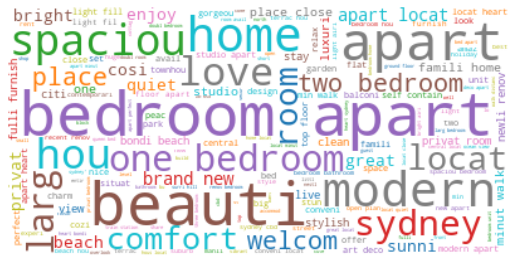

In [55]:
from wordcloud import WordCloud

fig, ax = plt.subplots()

wordcloud = WordCloud(background_color="white", colormap='tab10', max_words=200).generate(str(train_description))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')
plt.show()

In [56]:
#Create tokens that generate postive description, then create dummies

import re
count_description=[]

for i in train_full['description']:
    train_description=re.findall(r'(apart|bedroom|locat|beach|spaciou|modern)',i)
    count_train_description=len(train_description)!=0
    count_description.append(int(count_train_description))
train_full['description']=count_description
print(train_full['description'].value_counts())

1    8851
0     987
Name: description, dtype: int64


In [57]:
#test
import re
count_description=[]

for i in test_full['description']:
    test_description=re.findall(r'(apart|bedroom|locat|beach|spaciou|modern)',i)
    count_test_description=len(test_description)!=0
    count_description.append(int(count_test_description))
test_full['description']=count_description
print(test_full['description'].value_counts())

1    20791
0     2166
Name: description, dtype: int64


### Drop the remaining object variables

In [58]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9838 entries, 0 to 9837
Columns: 215 entries, name to email
dtypes: float64(21), int32(23), int64(117), object(27), uint8(27)
memory usage: 13.5+ MB


In [59]:
test_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22957 entries, 0 to 22956
Columns: 216 entries, id to email
dtypes: float64(22), int32(23), int64(116), object(27), uint8(28)
memory usage: 31.5+ MB


In [60]:
train_full = train_full.select_dtypes(exclude=['object'])
test_full = test_full.select_dtypes(exclude=['object'])

In [61]:
train_full.head()

,description,host_id,host_response_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,weekly_discount,monthly_discount,security_deposit_perc,cleaning_fee_perc,guests_included,extra_people_perc,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price,not given_review_scores_rating,not given_review_scores_accuracy,not given_review_scores_cleanliness,not given_review_scores_checkin,not given_review_scores_communication,not given_review_scores_location,not given_review_scores_value,not given_reviews_per_month,not given_weekly_discount,not given_monthly_discount,not given_security_deposit_perc,not given_cleaning_fee_perc,not given_space,not given_neighborhood_overview,not given_transit,not given_access,not given_interaction,not given_house_rules,not given_host_about,not given_host_neighbourhood,not given_neighbourhood,host_response_rate_NA,review_time,host_since_days,host_response_time_none,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Bed and breakfast,property_type_Bungalow,property_type_Condominium,property_type_Guest suite,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,host_is_superhost_t,host_identity_verified_t,is_location_exact_t,instant_bookable_t,require_guest_profile_picture_t,require_guest_phone_verification_t,tv,path,allow,stay,microwav,bed,stove,silverwar,linen,enter,workspac,oven,stair,condit,translat,door,detector,host,extra,balconi,hanger,blanket,hair,garden,hot,’,buzzer,monoxid,first,lock,luggag,dropoff,pet,intercom,basic,maker,elev,friendli,en,pillow,privat,carbon,lockbox,kit,fire,street,bedroom,grill,refriger,cook,iron,coffe,miss,internet,air,aid,bbq,dish,backyard,premis,patio,gym,hosting_amen,water,entranc,laptop,pool,long,cabl,room,greet,self,dryer,famili,dishwash,check-in,extinguish,_50,shampoo,live,heat,free,breakfast,park,term,kid,wireless,step,offline_government_id,review,phone,government_id,jumio,email
0,1,35821676,100,9,-33.748430,151.066090,2,1.000000,1.000000,1.000000,0.000000,0.000000,259.000000,69.000000,1,52,2,1125,2,2,1125,1125,2.000000,1125.000000,13,21,51,326,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7,5,2,0,0.000000,58.000000,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,1,0,0.000000,1608,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,1,1,1,1
1,1,61001305,100,1,-33.755460,151.295090,3,1.000000,1.000000,2.000000,0.000000,0.000000,160.000000,68.000000,2,8,3,60,3,3,60,60,3.000000,60.000000,1,14,44,311,2,1,70.000000,10.000000,7.000000,10.000000,10.000000,10.000000,10.000000,2,1,1,0,0.150000,125.000000,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,0,217.000000,1348,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,0,1,1,1,1,1
2,1,8930702,0,1,-33.891820,151.177230,2,1.000000,1.000000,1.000000,0

### Solve inconsistencies between the training and test set

In [62]:
#Consistent the column of Train and Test
inconsistency_train=[]
for i in train_full.columns:
    if i not in test_full.columns:
        inconsistency_train.append(i)
        
inconsistency_train

['price', 'property_type_Bed and breakfast', 'detector']

In [63]:
inconsistency_test=[]
for i in test_full.columns:
    if i not in train_full.columns:
        inconsistency_test.append(i)
inconsistency_test

['id', 'property_type_Boutique hotel', 'property_type_Cottage', 'bathtub']

In [64]:
train_full=train_full.drop(['property_type_Bed and breakfast','detector'],axis=1).copy()
                            
test_full=test_full.drop(['id', 'property_type_Boutique hotel', 'property_type_Cottage',
                          'bathtub'],axis=1).copy()

In [65]:
print(train_full.shape)
print(test_full.shape)

(9838, 186)
(22957, 185)


In [66]:
train_full.head()

,description,host_id,host_response_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,weekly_discount,monthly_discount,security_deposit_perc,cleaning_fee_perc,guests_included,extra_people_perc,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price,not given_review_scores_rating,not given_review_scores_accuracy,not given_review_scores_cleanliness,not given_review_scores_checkin,not given_review_scores_communication,not given_review_scores_location,not given_review_scores_value,not given_reviews_per_month,not given_weekly_discount,not given_monthly_discount,not given_security_deposit_perc,not given_cleaning_fee_perc,not given_space,not given_neighborhood_overview,not given_transit,not given_access,not given_interaction,not given_house_rules,not given_host_about,not given_host_neighbourhood,not given_neighbourhood,host_response_rate_NA,review_time,host_since_days,host_response_time_none,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Bungalow,property_type_Condominium,property_type_Guest suite,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,host_is_superhost_t,host_identity_verified_t,is_location_exact_t,instant_bookable_t,require_guest_profile_picture_t,require_guest_phone_verification_t,tv,path,allow,stay,microwav,bed,stove,silverwar,linen,enter,workspac,oven,stair,condit,translat,door,host,extra,balconi,hanger,blanket,hair,garden,hot,’,buzzer,monoxid,first,lock,luggag,dropoff,pet,intercom,basic,maker,elev,friendli,en,pillow,privat,carbon,lockbox,kit,fire,street,bedroom,grill,refriger,cook,iron,coffe,miss,internet,air,aid,bbq,dish,backyard,premis,patio,gym,hosting_amen,water,entranc,laptop,pool,long,cabl,room,greet,self,dryer,famili,dishwash,check-in,extinguish,_50,shampoo,live,heat,free,breakfast,park,term,kid,wireless,step,offline_government_id,review,phone,government_id,jumio,email
0,1,35821676,100,9,-33.748430,151.066090,2,1.000000,1.000000,1.000000,0.000000,0.000000,259.000000,69.000000,1,52,2,1125,2,2,1125,1125,2.000000,1125.000000,13,21,51,326,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7,5,2,0,0.000000,58.000000,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,1,0,0.000000,1608,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,1,1,1,1
1,1,61001305,100,1,-33.755460,151.295090,3,1.000000,1.000000,2.000000,0.000000,0.000000,160.000000,68.000000,2,8,3,60,3,3,60,60,3.000000,60.000000,1,14,44,311,2,1,70.000000,10.000000,7.000000,10.000000,10.000000,10.000000,10.000000,2,1,1,0,0.150000,125.000000,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,0,217.000000,1348,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,0,1,1,1,1,1
2,1,8930702,0,1,-33.891820,151.177230,2,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1,0,1,1125,1,1

# EDA

In [67]:
#Catergorise Data
continuous = []
dummy=[]
discrete=[]


for i in train_full.columns:
    if train_full[i].value_counts().shape[0]>20:
        continuous.append(i)
        
    elif train_full[i].value_counts().shape[0]==2:
        dummy.append(i)
    
    else:
        discrete.append(i)  
print(continuous)

['host_id', 'host_response_rate', 'host_listings_count', 'latitude', 'longitude', 'weekly_discount', 'monthly_discount', 'security_deposit_perc', 'cleaning_fee_perc', 'extra_people_perc', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'reviews_per_month', 'price', 'review_time', 'host_since_days']


## Distribution Plots

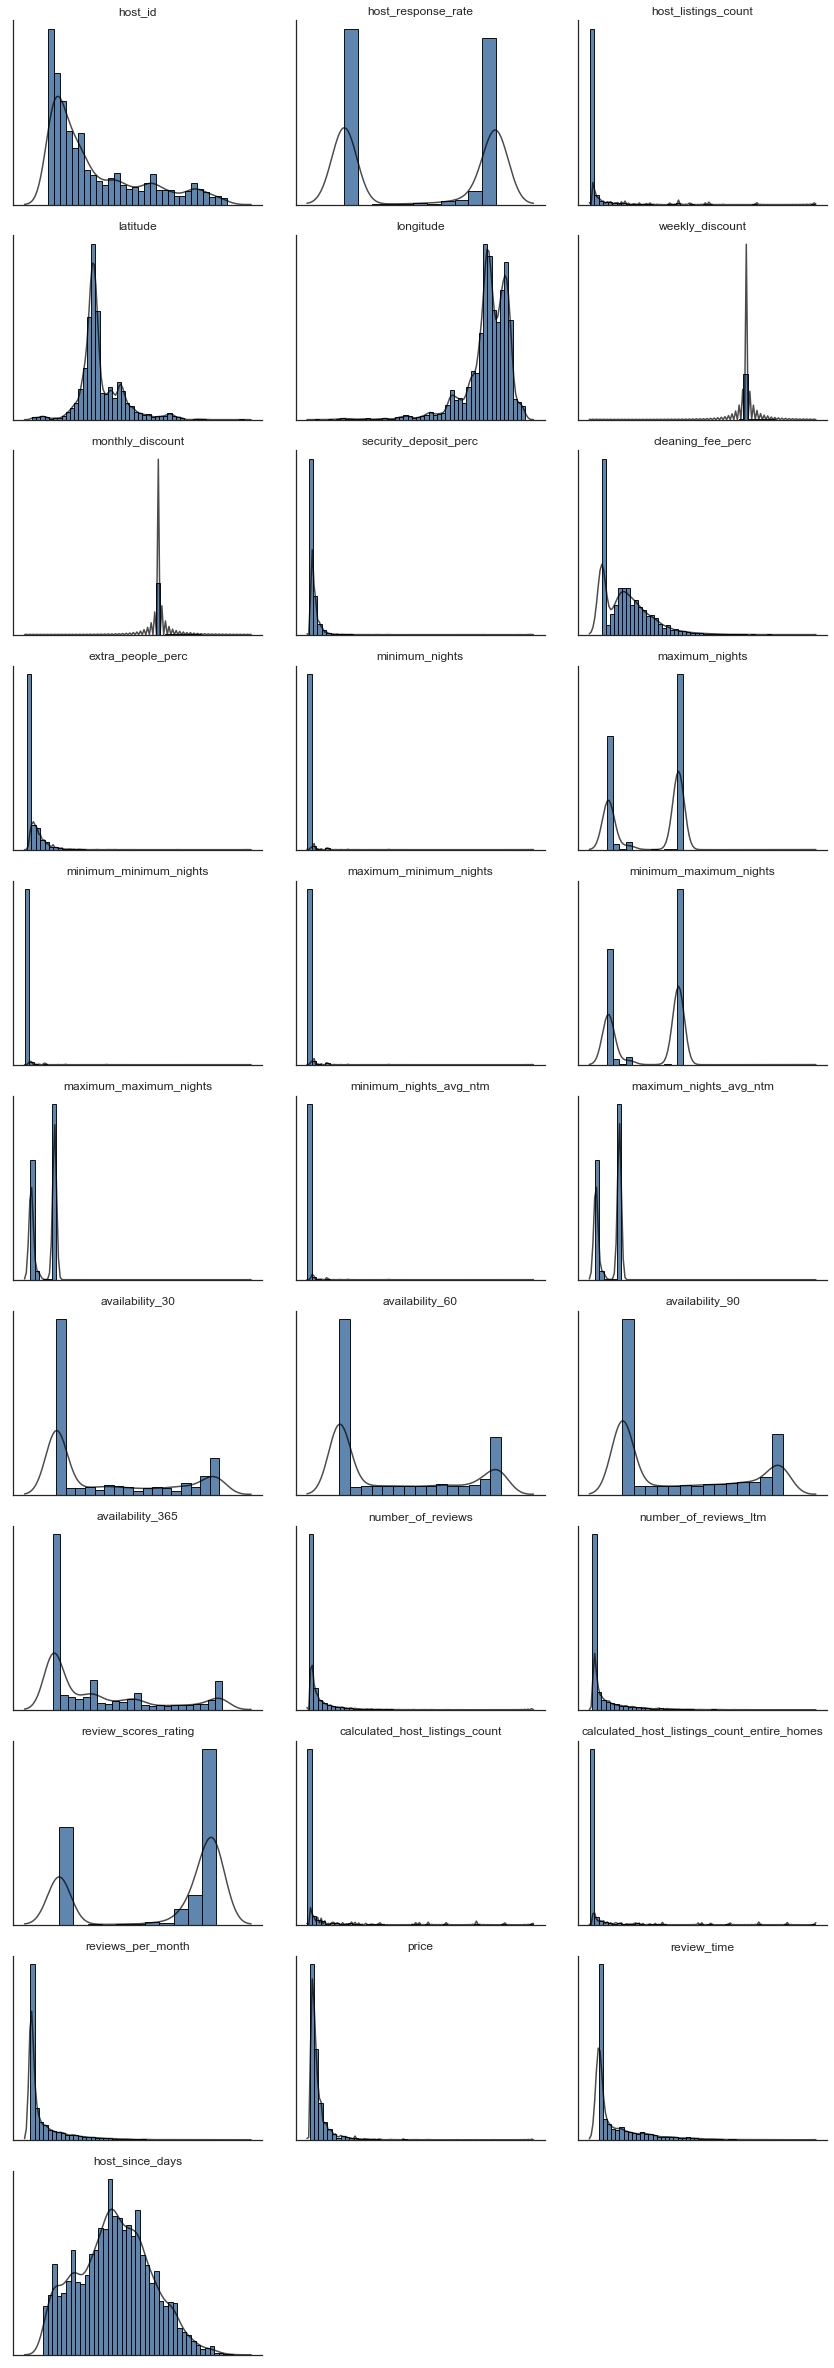

In [68]:
from statlearning import plot_dists
plot_dists(train_full[continuous])
plt.show()

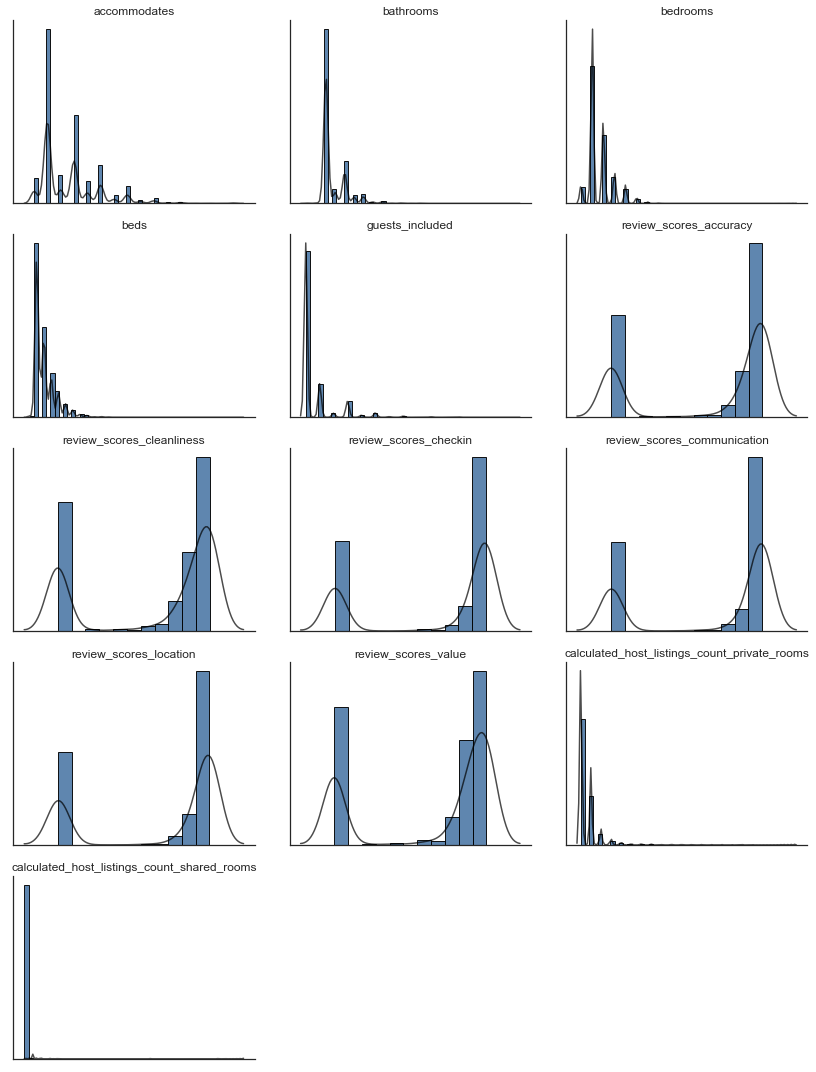

In [69]:
plot_dists(train_full[discrete])
plt.show()

## Regression Plots

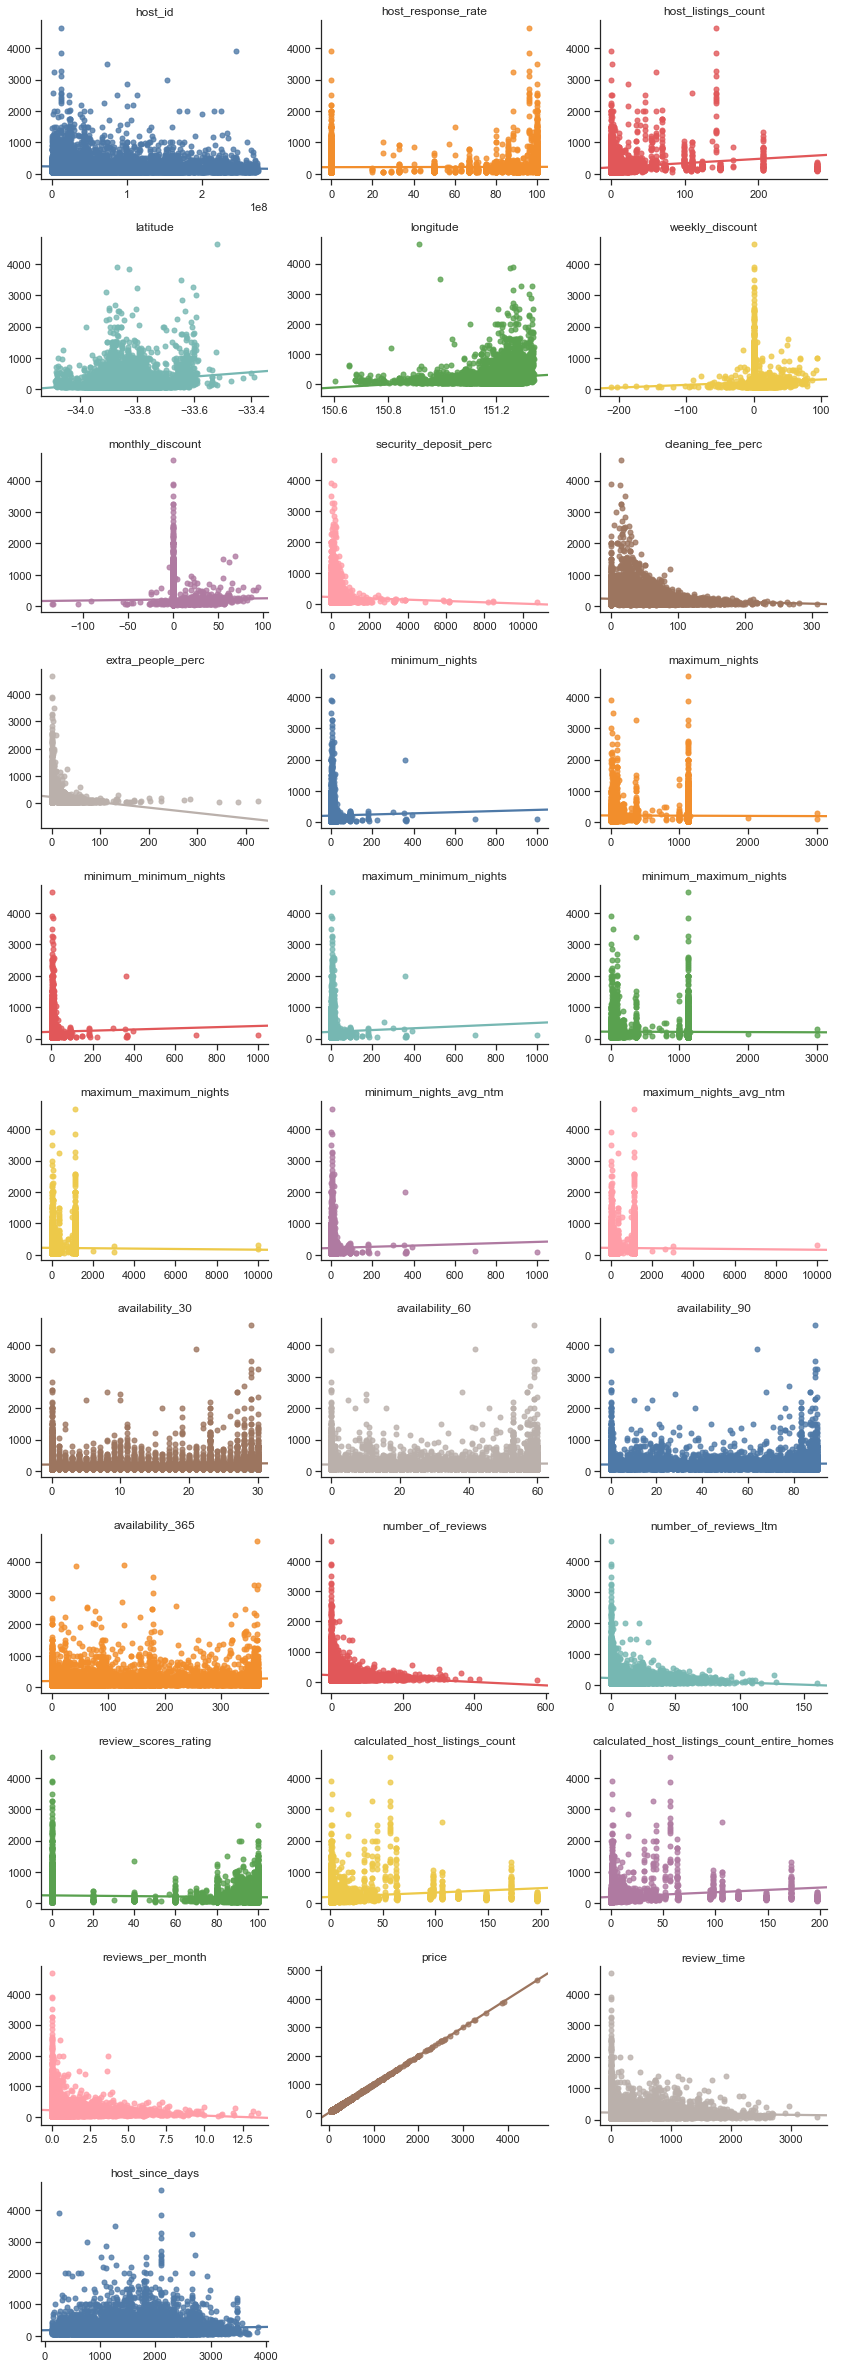

In [70]:
from statlearning import plot_regressions

plot_regressions(train_full[continuous], train_full['price'])
plt.show()

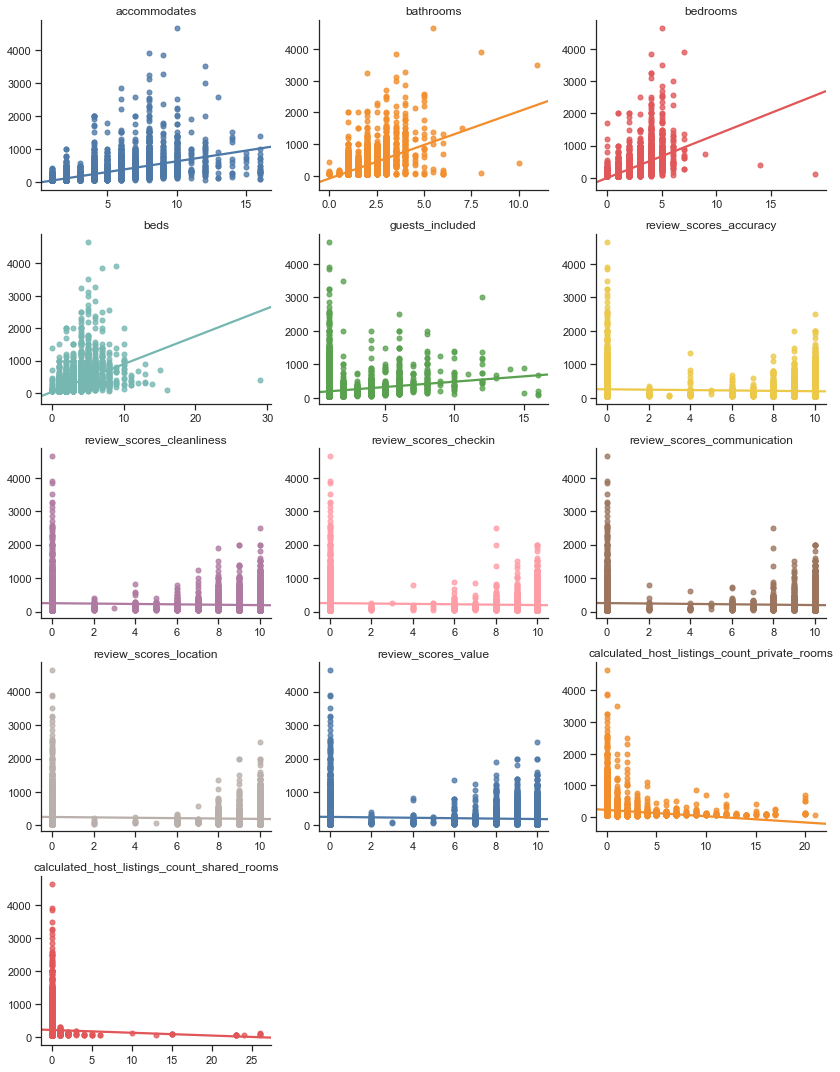

In [71]:
from statlearning import plot_regressions

plot_regressions(train_full[discrete], train_full['price'])
plt.show()

# Correlation

In [72]:
train_full.corr()['price'].sort_values()

room_type_Private room                            -0.310709
extra_people_perc                                 -0.142282
calculated_host_listings_count_private_rooms      -0.132981
not given_security_deposit_perc                   -0.132439
cancellation_policy_flexible                      -0.117225
review_scores_value                               -0.111341
review_scores_communication                       -0.106473
review_scores_checkin                             -0.105858
review_scores_accuracy                            -0.103870
review_scores_location                            -0.103184
hosting_amen                                      -0.101216
translat                                          -0.101216
miss                                              -0.101216
review_scores_cleanliness                         -0.100608
review_scores_rating                              -0.099248
not given_cleaning_fee_perc                       -0.096218
reviews_per_month                       

In [73]:
train_full.corr()['price'].sort_values().index

Index(['room_type_Private room', 'extra_people_perc',
       'calculated_host_listings_count_private_rooms',
       'not given_security_deposit_perc', 'cancellation_policy_flexible',
       'review_scores_value', 'review_scores_communication',
       'review_scores_checkin', 'review_scores_accuracy',
       'review_scores_location',
       ...
       'famili', 'premis', 'pool', 'latitude', 'property_type_House', 'beds',
       'accommodates', 'bathrooms', 'bedrooms', 'price'],
      dtype='object', length=186)

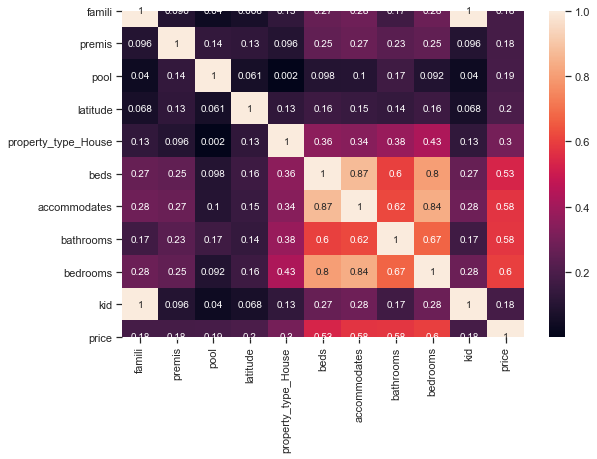

In [74]:
# Top 10 positive
corr=train_full[['famili', 'premis', 'pool', 'latitude', 'property_type_House', 'beds',
       'accommodates', 'bathrooms', 'bedrooms','kid','price']].corr()

plt.figure()
sns.heatmap(corr,annot = True)

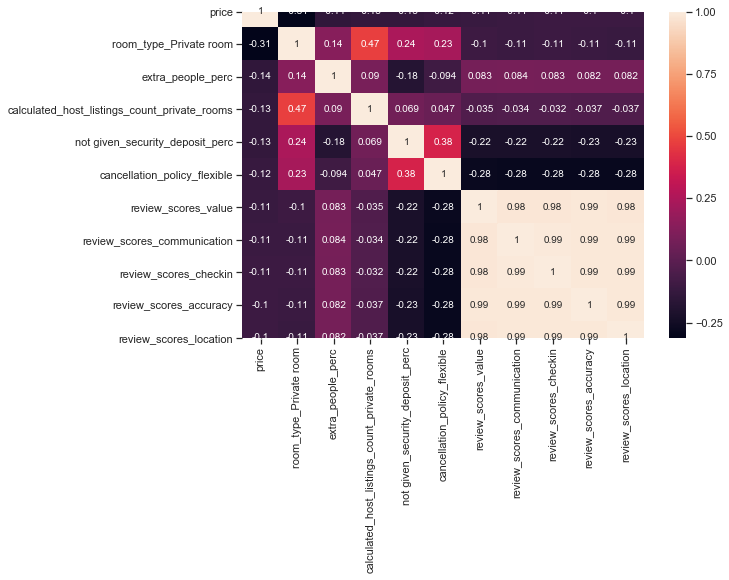

In [75]:
#top 10 negtive

corr=train_full[['price','room_type_Private room', 'extra_people_perc',
       'calculated_host_listings_count_private_rooms',
       'not given_security_deposit_perc', 'cancellation_policy_flexible',
       'review_scores_value', 'review_scores_communication',
       'review_scores_checkin', 'review_scores_accuracy',
       'review_scores_location',]].corr()

plt.figure()
sns.heatmap(corr,annot = True)

# Feature Enginering

## Dealing with multicollinearity

In [76]:
#Function that removes the features with a correlation higher than 0.9
def correl_check(data,response):
    #Correlation with output variable
    cor=data.corr().round(3)
    cor_target = abs(cor[response])

    #Selecting highly correlated features with the response
    relevant_features = cor_target[cor_target>0.0]
    rel_features=relevant_features.index
    rel_features=[variable for variable in relevant_features.index if variable!=response]
    
    #Identifying features that may cause collinearity problems
    
    variables_to_be_removed=[]
    for i in rel_features:
        for j in rel_features:
            if i!=j:
                if data.loc[:,[i,j]].corr().iloc[0,1]>=0.9:
                    if data.loc[:,[i,'price']].corr().iloc[0,1]>data.loc[:,[j,'price']].corr().iloc[0,1]:
                        variables_to_be_removed.append(j)
                    else:
                        variables_to_be_removed.append(i)
                
    variables_to_be_removed= set(variables_to_be_removed)
    
    #Removing features that may cause collinearity problems from the predictors
    
    for k in rel_features:
        for z in variables_to_be_removed:
            if k == z:
                rel_features.remove(z)

    return rel_features

rel_features=correl_check(train_full, 'price')



In [77]:
#Define predictors and response
response='price'

corr_check=False

if corr_check==True:
    predictors=rel_features
else:
    predictors=(train_full.columns).drop(response)

## Log Transforming the response variable

In [78]:
 train_full.loc[:,'price']=np.log(train_full['price'])

## Splitting the training set 

In [79]:
### Splitting the training set into a training and a validation set
index_train,index_val=train_test_split(train_full.index, train_size=0.7, random_state=42)
X_train_full=train_full.loc[index_train,predictors]
y_train_full=train_full.loc[index_train,response]
X_val_full=train_full.loc[index_val,predictors]
y_val_full=train_full.loc[index_val,response]

## Yeo_Johnson transformation 

In [80]:
X_train_full_tr=X_train_full.copy()
X_train_full_tr=X_train_full_tr.drop(['latitude','longitude'],axis=1)
from sklearn.preprocessing import PowerTransformer
yj_transf = PowerTransformer(method='yeo-johnson').fit(X_train_full_tr)
X_train_full_tr=pd.DataFrame(yj_transf.transform(X_train_full_tr), columns=X_train_full_tr.columns, index=X_train_full.index)
X_train_full_yj=X_train_full_tr.join(X_train_full['longitude']).join(X_train_full['latitude'])

In [81]:
X_val_full_tr=X_val_full.copy()
X_val_full_tr=X_val_full_tr.drop(['latitude','longitude'],axis=1)
X_val_full_tr=pd.DataFrame(yj_transf.transform(X_val_full_tr), columns=X_val_full_tr.columns, index=X_val_full.index)
X_val_full_yj=X_val_full_tr.join(X_val_full['longitude']).join(X_val_full['latitude'])

## Scaling

In [82]:
### Scaling the predictors to later perform regularization
scaler =StandardScaler().fit(X_train_full[predictors])
X_train_full_scaled=X_train_full.copy()
X_val_full_scaled=X_val_full.copy()
X_train_full_scaled.loc[:,predictors]=scaler.transform(X_train_full[predictors])
X_val_full_scaled.loc[:,predictors]=scaler.transform(X_val_full[predictors])

# Models

## Linear Models

In [83]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
#LinearRegression no yj
ols1=LinearRegression()
ols1.fit(X_train_full, y_train_full)
#LinearRegression w yj
ols2=LinearRegression()
ols2.fit(X_train_full_yj,y_train_full)
#LinearRegression scaled
ols3=LinearRegression()
ols3.fit(X_train_full_scaled,y_train_full)

#Ridgeregression
alphas = list(np.logspace(-15, 15, 151, base=2))
ridge=RidgeCV(alphas=alphas)
ridge.fit(X_train_full_scaled,y_train_full)

#Lasso

lasso=LassoCV(alphas=alphas, random_state=42)
lasso.fit(X_train_full_scaled,y_train_full)



C:\Users\filip\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\filip\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.28783977986881837, tolerance: 0.2310071722985648
  tol, rng, random, positive)
C:\Users\filip\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2065317236474584, tolerance: 0.2310071722985648
  tol, rng, random, positive)
C:\Users\filip\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number

LassoCV(alphas=[3.0517578125e-05, 3.505549179068098e-05, 4.026818575356734e-05,
                4.625599873383782e-05, 5.313418965430448e-05, 6.103515625e-05,
                7.011098358136196e-05, 8.053637150713468e-05,
                9.251199746767564e-05, 0.00010626837930860896, 0.0001220703125,
                0.00014022196716272393, 0.00016107274301426937,
                0.0001850239949353513, 0.0002125367586172179, 0.000244140625,
                0.0...
                0.0005608878686508957, 0.0006442909720570775,
                0.000740095979741406, 0.0008501470344688716, 0.0009765625,
                0.0011217757373017914, 0.001288581944114155,
                0.001480191959482812, 0.0017002940689377433, ...],
        copy_X=True, cv='warn', eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=42, selection='cyclic', tol=0.0001,
        verbose=False)

## Non linear Models

### Random Forest

In [84]:
# Define a grid of values that will be used for the randomized search

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Minimum number of samples required to split a node
min_samples_split = [2]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)



{'n_estimators': [10, 231, 452, 673, 894, 1115, 1336, 1557, 1778, 2000], 'max_features': ['auto', 'log2'], 'min_samples_split': [2], 'min_samples_leaf': [1], 'bootstrap': [True]}


In [85]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


#RandomForest
rf=RandomForestRegressor()
rf.fit(X_train_full,y_train_full)

#RandomForestRandomizedSearch
rf_random=RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf_random, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train_full, y_train_full)
rf_random.best_params_



C:\Users\filip\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\filip\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 41.7min finished


{'n_estimators': 1778,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'bootstrap': True}

### Gradient Boosting

The most important hyperparameters for Boosting are the n of estimators, learning rate and max depth.

In [86]:
#Define a grid of values that will be used for Gradient Boosting and XGBoost
from sklearn.ensemble import GradientBoostingRegressor
tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500, 2000],
    'max_depth' : [2 ,3, 4],
    'subsample' : [0.6, 0.8, 1.0]
}

In [87]:
%%time

model = GradientBoostingRegressor()

#GradientBoosting
gbo=GradientBoostingRegressor()
gbo.fit(X_train_full,y_train_full)

#Optimizing the Gradient Boosting with a randomized search
gb=GradientBoostingRegressor()
gb = RandomizedSearchCV(gb, tuning_parameters, n_iter = 50, cv = 3, verbose=2, n_jobs=-1, random_state=42)
gb.fit(X_train_full, y_train_full)
gb.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 31.5min finished


Wall time: 33min 34s


{'subsample': 0.6, 'n_estimators': 2000, 'max_depth': 4, 'learning_rate': 0.01}

### XGBoost

In [88]:
import xgboost as xgb

In [89]:
%%time

#XGBoost Benchmark
model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=0)
model.fit(X_train_full, y_train_full)

#XGBoost Randomized Search
xbst=xgb.XGBRegressor(objective='reg:squarederror')
xbst = RandomizedSearchCV(xbst, tuning_parameters, n_iter = 50, cv = 3, random_state=42, n_jobs=-1)
xbst.fit(X_train_full, y_train_full)
xbst.best_params_

C:\Users\filip\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Wall time: 38min 22s


{'subsample': 0.8, 'n_estimators': 750, 'max_depth': 4, 'learning_rate': 0.05}

### LightBoost

In [90]:
conda install lightgbm

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [91]:
import lightgbm as lgb

In [92]:
lbo=lgb.LGBMRegressor(objective='regression')
lbo.fit(X_train_full,y_train_full)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [93]:
%%time

light = lgb.LGBMRegressor(objective='regression')

tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500, 2000],
    'num_leaves' : list(np.arange(2, 64)),
    'subsample' : [0.6, 0.8, 1.0],
}


lbst = RandomizedSearchCV(light, tuning_parameters, n_iter = 50, cv = 3, n_jobs=-1, random_state=42)
lbst.fit(X_train_full, y_train_full)

print('Best parameters found by randomised search:', lbst.best_params_, '\n')

Best parameters found by randomised search: {'subsample': 1.0, 'num_leaves': 9, 'n_estimators': 750, 'learning_rate': 0.1} 

Wall time: 9min 54s


# Model Selection

In [94]:
# Initialise table
columns=['RMSE', 'R-Squared', 'MAE']
rows=['Linear Regression NO YJ','Linear Regression YJ','Linear Regression Scaled','Ridge','Lasso',
      'RF Basic','GB Basic','LB Basic','XGBasic','RF Optimized','GBRegressor Optimized','LightB Optimized',
      'XGB Optimized']
results = pd.DataFrame(0.0, columns=columns, index=rows)
best_rf = rf_random.best_estimator_
best_gb=gb.best_estimator_
best_lb=lbst.best_estimator_
best_xgb=xbst.best_estimator_
# List algorithms
methods = [ols1,ols2,ols3,ridge,lasso,rf,gbo,lbo,model,best_rf,best_gb, best_lb,best_xgb] 
val_set=[X_val_full,X_val_full_yj,X_val_full_scaled,X_val_full_scaled,
         X_val_full_scaled,X_val_full,X_val_full,X_val_full,X_val_full,X_val_full,X_val_full,X_val_full,X_val_full]


# Computer predictions
for i, (method,val) in enumerate(zip(methods,val_set)):
    y_pred = method.predict(val)
    results.iloc[i, 0] = np.sqrt(mean_squared_error(y_val_full, y_pred))
    results.iloc[i, 1] = r2_score(y_val_full, y_pred)
    results.iloc[i, 2] = mean_absolute_error(y_val_full, y_pred)
    
results

,RMSE,R-Squared,MAE
Linear Regression NO YJ,0.356710,0.737678,0.271323
Linear Regression YJ,0.376806,0.707289,0.286994
Linear Regression Scaled,0.360240,0.732460,0.275027
Ridge,0.356036,0.738669,0.271224
Lasso,0.356498,0.737990,0.271373
RF Basic,0.352569,0.743733,0.268780
GB Basic,0.328380,0.777691,0.249336
LB Basic,0.306442,0.806402,0.230791
XGBasic,0.327636,0.778697,0.248700
RF Optimized,0.334347,0.769538,0.252867


# Model Stacking

In [95]:
pip install vecstack 

Note: you may need to restart the kernel to use updated packages.


In [96]:
from vecstack import stacking

# Ensembling the best models

### GB, LB, XGB with five folds and ols as a metaregressor

In [97]:
models= [best_gb,best_lb,best_xgb]
S_train_full2 ,S_val_full2= stacking(models,X_train_full,y_train_full,X_val_full,regression=True,n_folds=5,
                                   shuffle=True, random_state=42)

o2=LinearRegression()
o2.fit(S_train_full2, y_train_full)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### LB,XGB,LASSO with five folds and ols as a metaregressor

In [98]:
models= [lasso,best_lb,best_xgb]

S_train_full4 ,S_val_full4= stacking(models,X_train_full,y_train_full,X_val_full,regression=True,n_folds=5,
                                     random_state=42)

o4=LinearRegression()
o4.fit(S_train_full4,y_train_full)

C:\Users\filip\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\filip\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.95690768357656, tolerance: 0.18315298419743642
  tol, rng, random, positive)
C:\Users\filip\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 533.4221020100152, tolerance: 0.18315298419743642
  tol, rng, random, positive)
C:\Users\filip\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number o

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### LASSO,RF,LB with five folds and OLS as a metaregressor

In [99]:
models= [lasso,best_lb,best_rf]

S_train_full5 ,S_val_full5= stacking(models,X_train_full,y_train_full,X_val_full,regression=True,n_folds=5,
                                     random_state=42)

o5=LinearRegression()
o5.fit(S_train_full5,y_train_full)

C:\Users\filip\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\filip\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.95690768357656, tolerance: 0.18315298419743642
  tol, rng, random, positive)
C:\Users\filip\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 533.4221020100152, tolerance: 0.18315298419743642
  tol, rng, random, positive)
C:\Users\filip\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number o

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Model Selection after Stacking

Now best_rf is rf_random (it has to be corrected before submitting, I am doing it now to save time)

In [100]:
# Initialise table
columns=['RMSE', 'R-Squared', 'MAE']
rows=['Linear Regression NO YJ','Linear Regression YJ','Linear Regression Scaled','Ridge','Lasso','RF Basic'
      ,'GB Basic','LB Basic','XGB Basic','RF Optimized','GB Optimized','LB Optimized','XGB Optimized',
      'Stack gb,lb,xgb.cv5','Stack lasso,lb,xgb.cv5','Stack lasso,rf,lb.cv5']
results = pd.DataFrame(0.0, columns=columns, index=rows)
best_gb=gb.best_estimator_
best_lb=lbst.best_estimator_
best_xgb=xbst.best_estimator_
best_rf=rf_random.best_estimator_
# List algorithms
methods = [ols1,ols2,ols3,ridge,lasso,rf,gbo,lbo,model,best_rf,best_gb,best_lb,best_xgb,o2,o4,o5] 
val_set=[X_val_full,X_val_full_yj,X_val_full_scaled,X_val_full_scaled,
         X_val_full_scaled,X_val_full,X_val_full,X_val_full,X_val_full,
         X_val_full,X_val_full,X_val_full,X_val_full,S_val_full2,
          S_val_full4, S_val_full5]


# Computer predictions
for i, (method,val) in enumerate(zip(methods,val_set)):
    y_pred = method.predict(val)
    results.iloc[i, 0] = np.sqrt(mean_squared_error(y_val_full, y_pred))
    results.iloc[i, 1] = r2_score(y_val_full, y_pred)
    results.iloc[i, 2] = mean_absolute_error(y_val_full, y_pred)
results.round(5)

,RMSE,R-Squared,MAE
Linear Regression NO YJ,0.356710,0.737680,0.271320
Linear Regression YJ,0.376810,0.707290,0.286990
Linear Regression Scaled,0.360240,0.732460,0.275030
Ridge,0.356040,0.738670,0.271220
Lasso,0.356500,0.737990,0.271370
RF Basic,0.352570,0.743730,0.268780
GB Basic,0.328380,0.777690,0.249340
LB Basic,0.306440,0.806400,0.230790
XGB Basic,0.327640,0.778700,0.248700
RF Optimized,0.334350,0.769540,0.252870


# Plotting the coefficients

(<Figure size 648x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1cd54cc0108>)

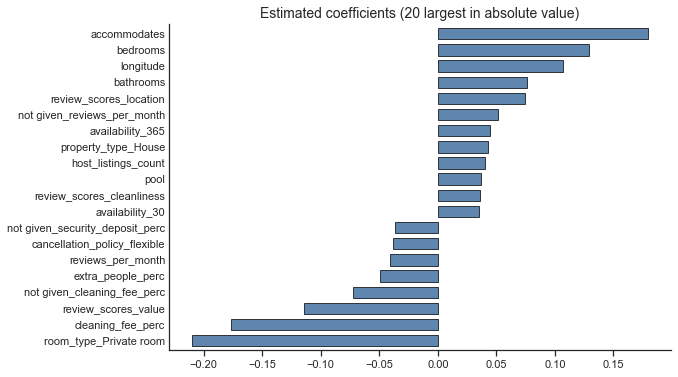

In [101]:
from statlearning import plot_coefficients
plot_coefficients(lasso, predictors)

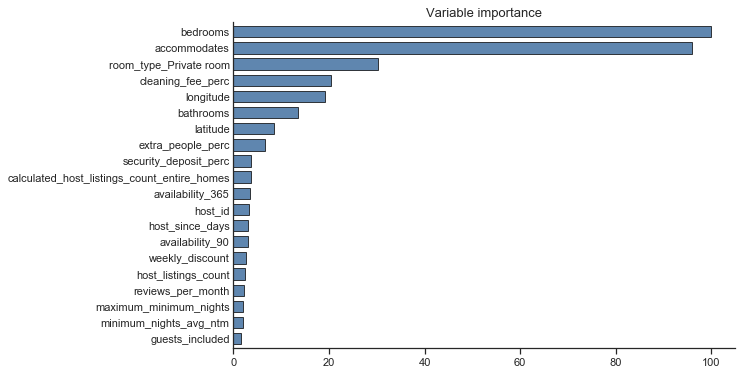

In [102]:
from statlearning import plot_feature_importance
plot_feature_importance(best_rf, predictors)
plt.show()

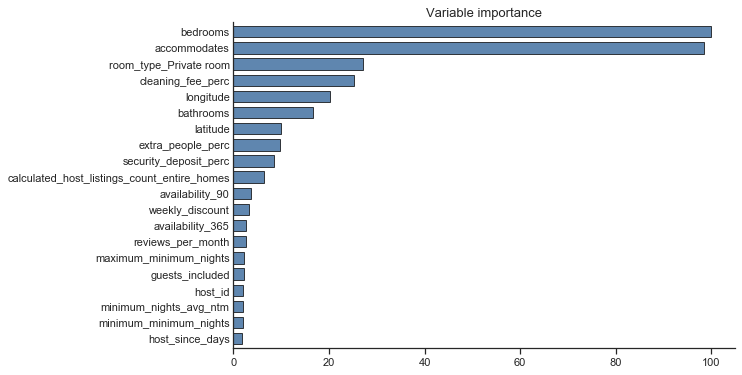

In [103]:
from statlearning import plot_feature_importance
plot_feature_importance(best_gb, predictors)
plt.show()

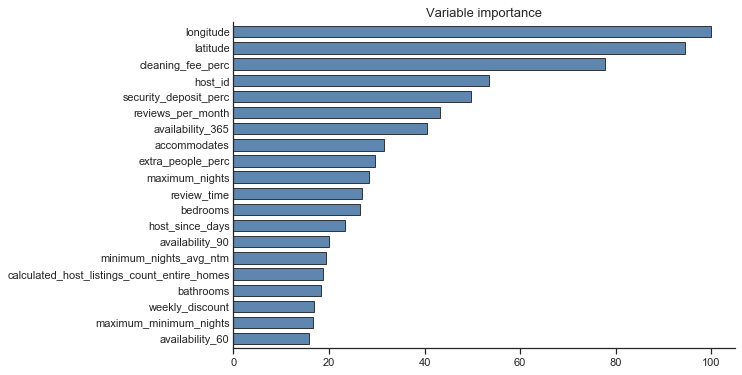

In [104]:
from statlearning import plot_feature_importance
plot_feature_importance(best_lb, predictors)
plt.show()

# Result Submission

In [112]:
X_train_full_=train_full.loc[:,predictors]
y_train_full_=train_full.loc[:,response]
X_test_full=test_full.loc[:,predictors]

models= [lasso,best_lb,best_xgb]

S_train_full_ ,S_test_full= stacking(models,X_train_full_,y_train_full_,X_test_full,regression=True,n_folds=5,
                                     random_state=42)

o_=LinearRegression()
o_.fit(S_train_full_,y_train_full_)

submission=pd.DataFrame(0.0, columns=['Id','price'],index=test_full.index)
y_pred_=o_.predict(S_test_full)
submission.loc[:,'Id']=test_full.index
submission.loc[:,'price']=(np.exp(y_pred_)).astype(int)

submission.to_csv('stacking.csv',index=False)

C:\Users\filip\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\filip\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.424762893587513, tolerance: 0.26906696282531967
  tol, rng, random, positive)
C:\Users\filip\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7175329613935446, tolerance: 0.26906696282531967
  tol, rng, random, positive)
C:\Users\filip\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number

# Insight

### Plotting the prices on the map

C:\Users\filip\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


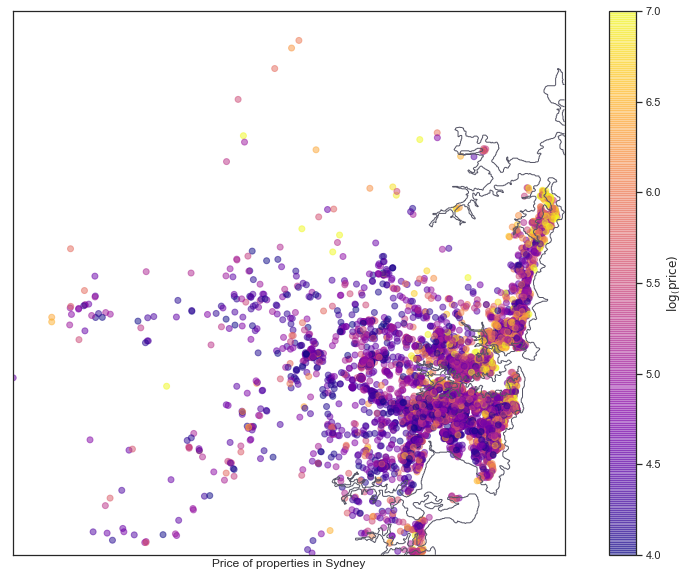

In [113]:
#the distance to CBD
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(16, 10))
earth = Basemap( 
    projection='tmerc', 
    lon_0=151.208532, lat_0=-33.858581,
    resolution='f',
    ellps='WGS84',
    epsg=4326,
    llcrnrlon=150.601470, llcrnrlat=-34.088,
    urcrnrlon=151.35, urcrnrlat=-33.35)

#earth.arcgisimage(service='ESRI_Imagery_World_2D', verbose=True, zorder=1)

earth.drawcoastlines(color='#555566', linewidth=1)


plt.scatter(train_full['longitude'], train_full['latitude'], c=train_full['price'], cmap='plasma' ,alpha=0.5)
plt.colorbar(label=r'$\log_({\rm price})$')
plt.clim(4, 7)
plt.xlabel("Price of properties in Sydney")

plt.savefig('Sydney.png')


### Creating a DataFrame with the average price by city

In [115]:
train['price']=train['price'].str.replace('$','')
train['price']=train['price'].str.replace(',','')
train.loc[:,'price']=train.loc[:,'price'].astype(float)

In [116]:
Price_by_city=pd.DataFrame(0.0, columns=['city','price'], index=np.arange(len(train['city'].unique())))
Price_by_city.loc[:,'city']=train['city'].unique()
for i in np.arange(len(train['city'].unique())):
    Price_by_city.loc[i,'price']=train[train['city']==Price_by_city.loc[i,'city']]['price'].mean()    
Price_by_city=Price_by_city.sort_values(by='price',ascending=False)
Price_by_city.head(20)

,city,price
498,Kenthurst,3500.000000
447,Cattai,1668.000000
454,Clovelly,1500.000000
472,Galston,1327.000000
130,Bilgola,1287.500000
463,Bar Point,1192.000000
489,Mount Vernon,1190.000000
261,Palm Beach,1029.470588
499,"Clontarf, Sydney",990.000000
354,newport,826.000000


In [117]:
Lasso_coeff=pd.DataFrame(list(zip(predictors, lasso.coef_)), columns=['predictor name','coefficient'])
Lasso_coeff.sort_values(by='coefficient',ascending=False)

,predictor name,coefficient
6,accommodates,0.179805
8,bedrooms,0.128925
5,longitude,0.106944
7,bathrooms,0.076527
35,review_scores_location,0.074962
49,not given_reviews_per_month,0.051072
27,availability_365,0.044491
74,property_type_House,0.043185
3,host_listings_count,0.040691
157,pool,0.036781


In [ ]:
lasso.alpha_